/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0703 - loss: 0.6952
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0505 - loss: 0.0330
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0553 - loss: -0.7323
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0479 - loss: -1.6133     
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0870 - loss: -2.4213  
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0665 - loss: -3.7453 
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0511 - loss: -5.9426      
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0267 - loss: -8.3472     
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0567 - loss: -10.9289 
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0439 - loss: -14.5755      
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0704 - loss: -19.5642 
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Resultados do Modelo:
Acurácia: 0.058823529411764705
Precisão: 0.0034602076124567475
Recall: 0.058823529411764705
F1 Score: 0.0065359477124183
Matriz de Confusão:
 [[ 2  0  0]
 [17  0  0]
 [15  0  0]]

Modelo salvo como 'modelo_cleveland.h5'.


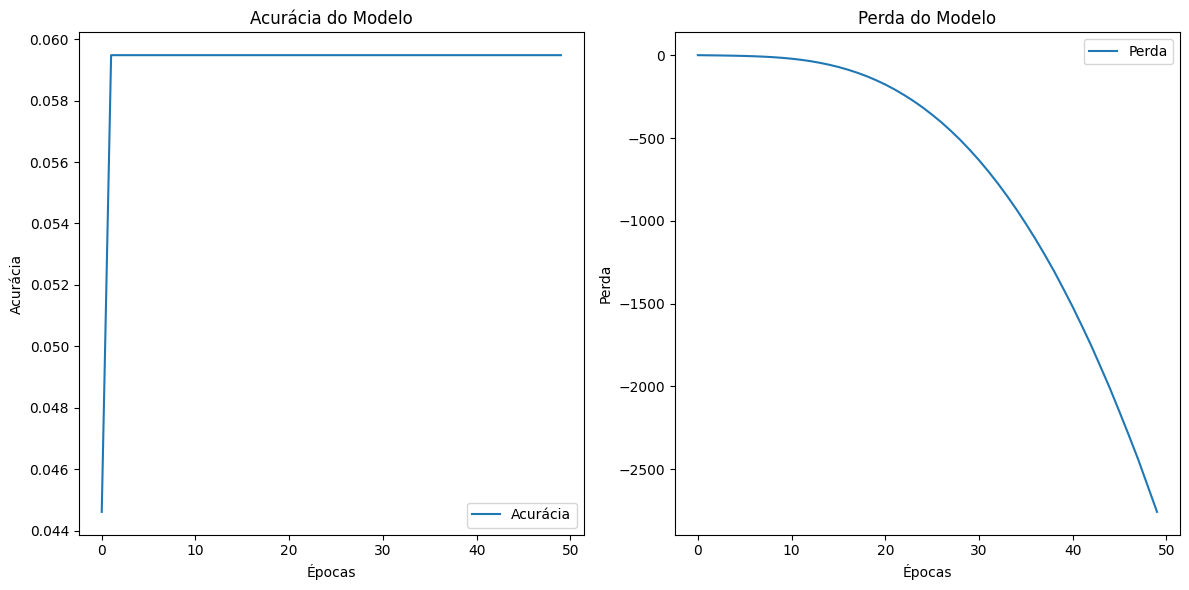


Carregando o modelo salvo...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Acurácia do modelo carregado: 0.058823529411764705
O modelo carregado produz os mesmos resultados do modelo original.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

# 1. Carregar os dados (substitua pelo caminho correto do arquivo CSV)
data = pd.read_csv("/content/sample_data/entradas_Parte2.csv")

# 2. Separar atributos e target
X = data.iloc[:,].values  # Todas as colunas menos o target
y = data.iloc[:, -1].values   # Última coluna como target

# 3. Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4. Dividir em treino e teste (11% para teste, 89% para treino)
test_size = 0.11
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# 5. Criar o modelo sequencial
model = Sequential([
    Dense(16, activation='relu', input_dim=13),  # Primeira camada
    Dense(8, activation='relu'),                 # Camada oculta
    Dense(1, activation='sigmoid')              # Última camada
])

# 6. Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7. Treinar o modelo e salvar histórico
batch_size = 10
epochs = 50
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# 8. Avaliar o modelo
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Or 'micro', 'macro'
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir resultados
print("\nResultados do Modelo:")
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matriz de Confusão:\n", conf_matrix)

# 9. Salvar a estrutura e os pesos da rede
model.save("modelo_cleveland.h5")
print("\nModelo salvo como 'modelo_cleveland.h5'.")

# 10. Plotar os gráficos de desempenho
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia')
plt.title('Acurácia do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda')
plt.title('Perda do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()

# 11. Carregar o modelo salvo e testar
print("\nCarregando o modelo salvo...")
loaded_model = load_model("modelo_cleveland.h5")

# Fazer predições com o modelo carregado
y_loaded_pred = (loaded_model.predict(X_test) > 0.5).astype(int)
accuracy_loaded = accuracy_score(y_test, y_loaded_pred)
print("Acurácia do modelo carregado:", accuracy_loaded)

# Confirmar que os resultados do modelo carregado são idênticos aos do modelo original
assert np.array_equal(y_pred, y_loaded_pred), "Os resultados do modelo carregado são diferentes!"
print("O modelo carregado produz os mesmos resultados do modelo original.")
